In this notebook for Zillow Home Value prediction I have performed LinearRegression and XGBoost,LightGBM on the properties dataset and train dataset. This dataset consists of some important features which are used for predicting future logerror.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Linear Regression on properties dataset of Zillow

Here we have used some of the python libraries to predict future trends in the home value prediction. Some of those libraries include numpy, pandas, seaborn, matplotlib, keras, xgboost, lightgbm, sklearn

# Linear Regression

Linear regression is a common Statistical Data Analysis technique  
It is used to determine the extent to which there is a linear relationship between a dependent variable and one or more independent variables
### Linear Regression is of 2 types :
1) Simple linear regression
2) Multiple linear regression

### Simple Linear Regression

In Simple linear regression a single independent variable is used to predict the value of a dependent variable

### Multiple Linear Regression

In  Multiple linear regression two or more independent variables are used to predict the value of a dependent variable

### The difference between the two is the number of independent variables. In both cases there is only a single dependent variable

### Correlation and Regression
Simple linear regression is similar to correlation in that the purpose is to measure to what extent there is a linear relationship between two variables. The major difference between the two is that correlation makes no distinction between independent and dependent variables while linear regression does. In particular, the purpose of linear regression is to "predict" the value of the dependent variable based upon the values of one or more independent variables

## Data Preprocessing and Exploratory Data Analysis(EDA)

### First we have imported various libraries so that we can use it for preprocessing the data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Here we have used Zillow Home Value Prediction properties2017 dataset. In this dataset we have various features like the bedroom count, bathroom count, tax amount,etc which can an important part of our analysis

In [3]:
project = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/properties_2017.csv",low_memory = False)

### Displaying the null values in the dataset. These null values need to filled with some appropriate value or should be dropped if they are irrelevant. This is an important step as a part of carrying out futher analysis and make the data completely ready for analysis.

In [4]:
project.isnull().sum()

,0
parcelid,0
airconditioningtypeid,2169855
architecturalstyletypeid,2979156
basementsqft,2983590
bathroomcnt,2957
bedroomcnt,2945
buildingclasstypeid,2972486
buildingqualitytypeid,1043822
calculatedbathnbr,117156
decktypeid,2967838


### Step Below drops the columns with maximum null values from the dataset, as these values are not important(since it has many unwanted values) and will impact the overall prediction of future house prices.

In [5]:
to_drop = ['taxdelinquencyyear',
           'taxdelinquencyflag',
           'fireplaceflag',
           'numberofstories',
           'yardbuildingsqft26',
           'yardbuildingsqft17',
           'typeconstructiontypeid',
           'threequarterbathnbr',
          'storytypeid',
          'regionidneighborhood',
          'pooltypeid7',
           'pooltypeid2',
           'pooltypeid10',
           'poolsizesum',
           'poolcnt',
           'hashottuborspa','garagetotalsqft',
           'garagecarcnt',
           'fireplacecnt',
           'finishedsquarefeet6',
           'finishedsquarefeet50',
           'finishedsquarefeet15',
           'finishedsquarefeet13',
           'finishedfloor1squarefeet',
           'decktypeid',
           'buildingqualitytypeid',
           'basementsqft',
           'architecturalstyletypeid',
           'airconditioningtypeid'
          ]

project.drop(to_drop, inplace = True, axis = 1)
project.head()

,parcelid,bathroomcnt,bedroomcnt,buildingclasstypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,...,96337.0,0.0,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,5.0,NaN,73026.0,NaN,6037.0,NaN,NaN,...,96095.0,0.0,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,3.0,NaN,5068.0,NaN,6037.0,NaN,NaN,...,96424.0,0.0,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,4.0,NaN,1776.0,NaN,6037.0,NaN,NaN,...,96450.0,0.0,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [6]:
todrop = ['buildingclasstypeid',
           'heatingorsystemtypeid',
           'propertyzoningdesc',
           'unitcnt'
          ]

project.drop(todrop, inplace = True, axis = 1)

#Displaying the first 5 rows of the updated dataset

project.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


### describe() function gives us the mean and minimum, count,also provides us with the mean and std values and also various set of values ranging from 25%,50% and 75%

In [7]:
project.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,2.985217e+06,2.982260e+06,2.982272e+06,2.868061e+06,2.940120e+06,2.720786e+06,2.982285e+06,2.868061e+06,2.982285e+06,2.982285e+06,...,2.982285e+06,2.972503e+06,2.982248e+06,2.937384e+06,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,2.910232e+06
mean,1.332586e+07,2.216196e+00,3.093362e+00,2.303826e+00,1.831455e+03,1.764045e+03,6.048053e+03,2.248089e+00,3.400131e+07,-1.182017e+08,...,2.569085e+03,9.655329e+04,1.474357e+00,1.964438e+03,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,6.048434e+13
std,7.909966e+06,1.078250e+00,1.271569e+00,1.003243e+00,1.954198e+03,1.031383e+03,2.024082e+01,9.929959e-01,2.435157e+05,3.455918e+05,...,7.886840e+02,3.680815e+03,2.839869e+00,2.364428e+01,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,3.249133e+11
min,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.037000e+03,1.000000e+00,3.332439e+07,-1.194758e+08,...,1.286000e+03,9.598200e+04,0.000000e+00,1.801000e+03,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,-1.000000e+00
25%,1.164371e+07,2.000000e+00,2.000000e+00,2.000000e+00,1.215000e+03,1.198000e+03,6.037000e+03,2.000000e+00,3.382740e+07,-1.183929e+08,...,1.286000e+03,9.618000e+04,0.000000e+00,1.950000e+03,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,6.037400e+13
50%,1.254509e+07,2.000000e+00,3.000000e+00,2.000000e+00,1.574000e+03,1.542000e+03,6.037000e+03,2.000000e+00,3.400807e+07,-1.181721e+08,...,3.101000e+03,9.637700e+04,0.000000e+00,1.963000e+03,1.270660e+05,3.211610e+05,2.016000e+03,1.766190e+05,4.007620e+03,6.037572e+13
75%,1.409712e+07,3.000000e+00,4.000000e+00,3.000000e+00,2.140000e+03,2.075000e+03,6.059000e+03,3.000000e+00,3.416186e+07,-1.179489e+08,...,3.101000e+03,9.697400e+04,0.000000e+00,1.981000e+03,2.040000e+05,5.140720e+05,2.016000e+03,3.261000e+05,6.230500e+03,6.059042e+13
max,1.696019e+08,3.200000e+01,2.500000e+01,3.200000e+01,9.525760e+05,4.270790e+05,6.111000e+03,3.200000e+01,3.481965e+07,-1.175543e+08,...,3.101000e+03,3.996750e+05,9.600000e+01,2.016000e+03,2.553212e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,4.830301e+14


### corr() function from pandas library of python or heatmap() function from seaborn library of python help us to identify the columns with maximum correlation and also allows us to decide and think logically which are the features that can be used based on the correlation.

In [8]:
project.corr()

ValueError: could not convert string to float: '010D'

### Below countplot show the range of bathroom and fractional bathroom counts which Zillow offers to its customers according to finished square feet area

### From the below countplot we can also conclude that most of the Zillow's customer enjoy have 3 or less bathrooms in there apartments

<ipython-input-9-3cbabf3ea9b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bathroomcnt", data=project, palette="Greens_d")


<Axes: xlabel='bathroomcnt', ylabel='count'>

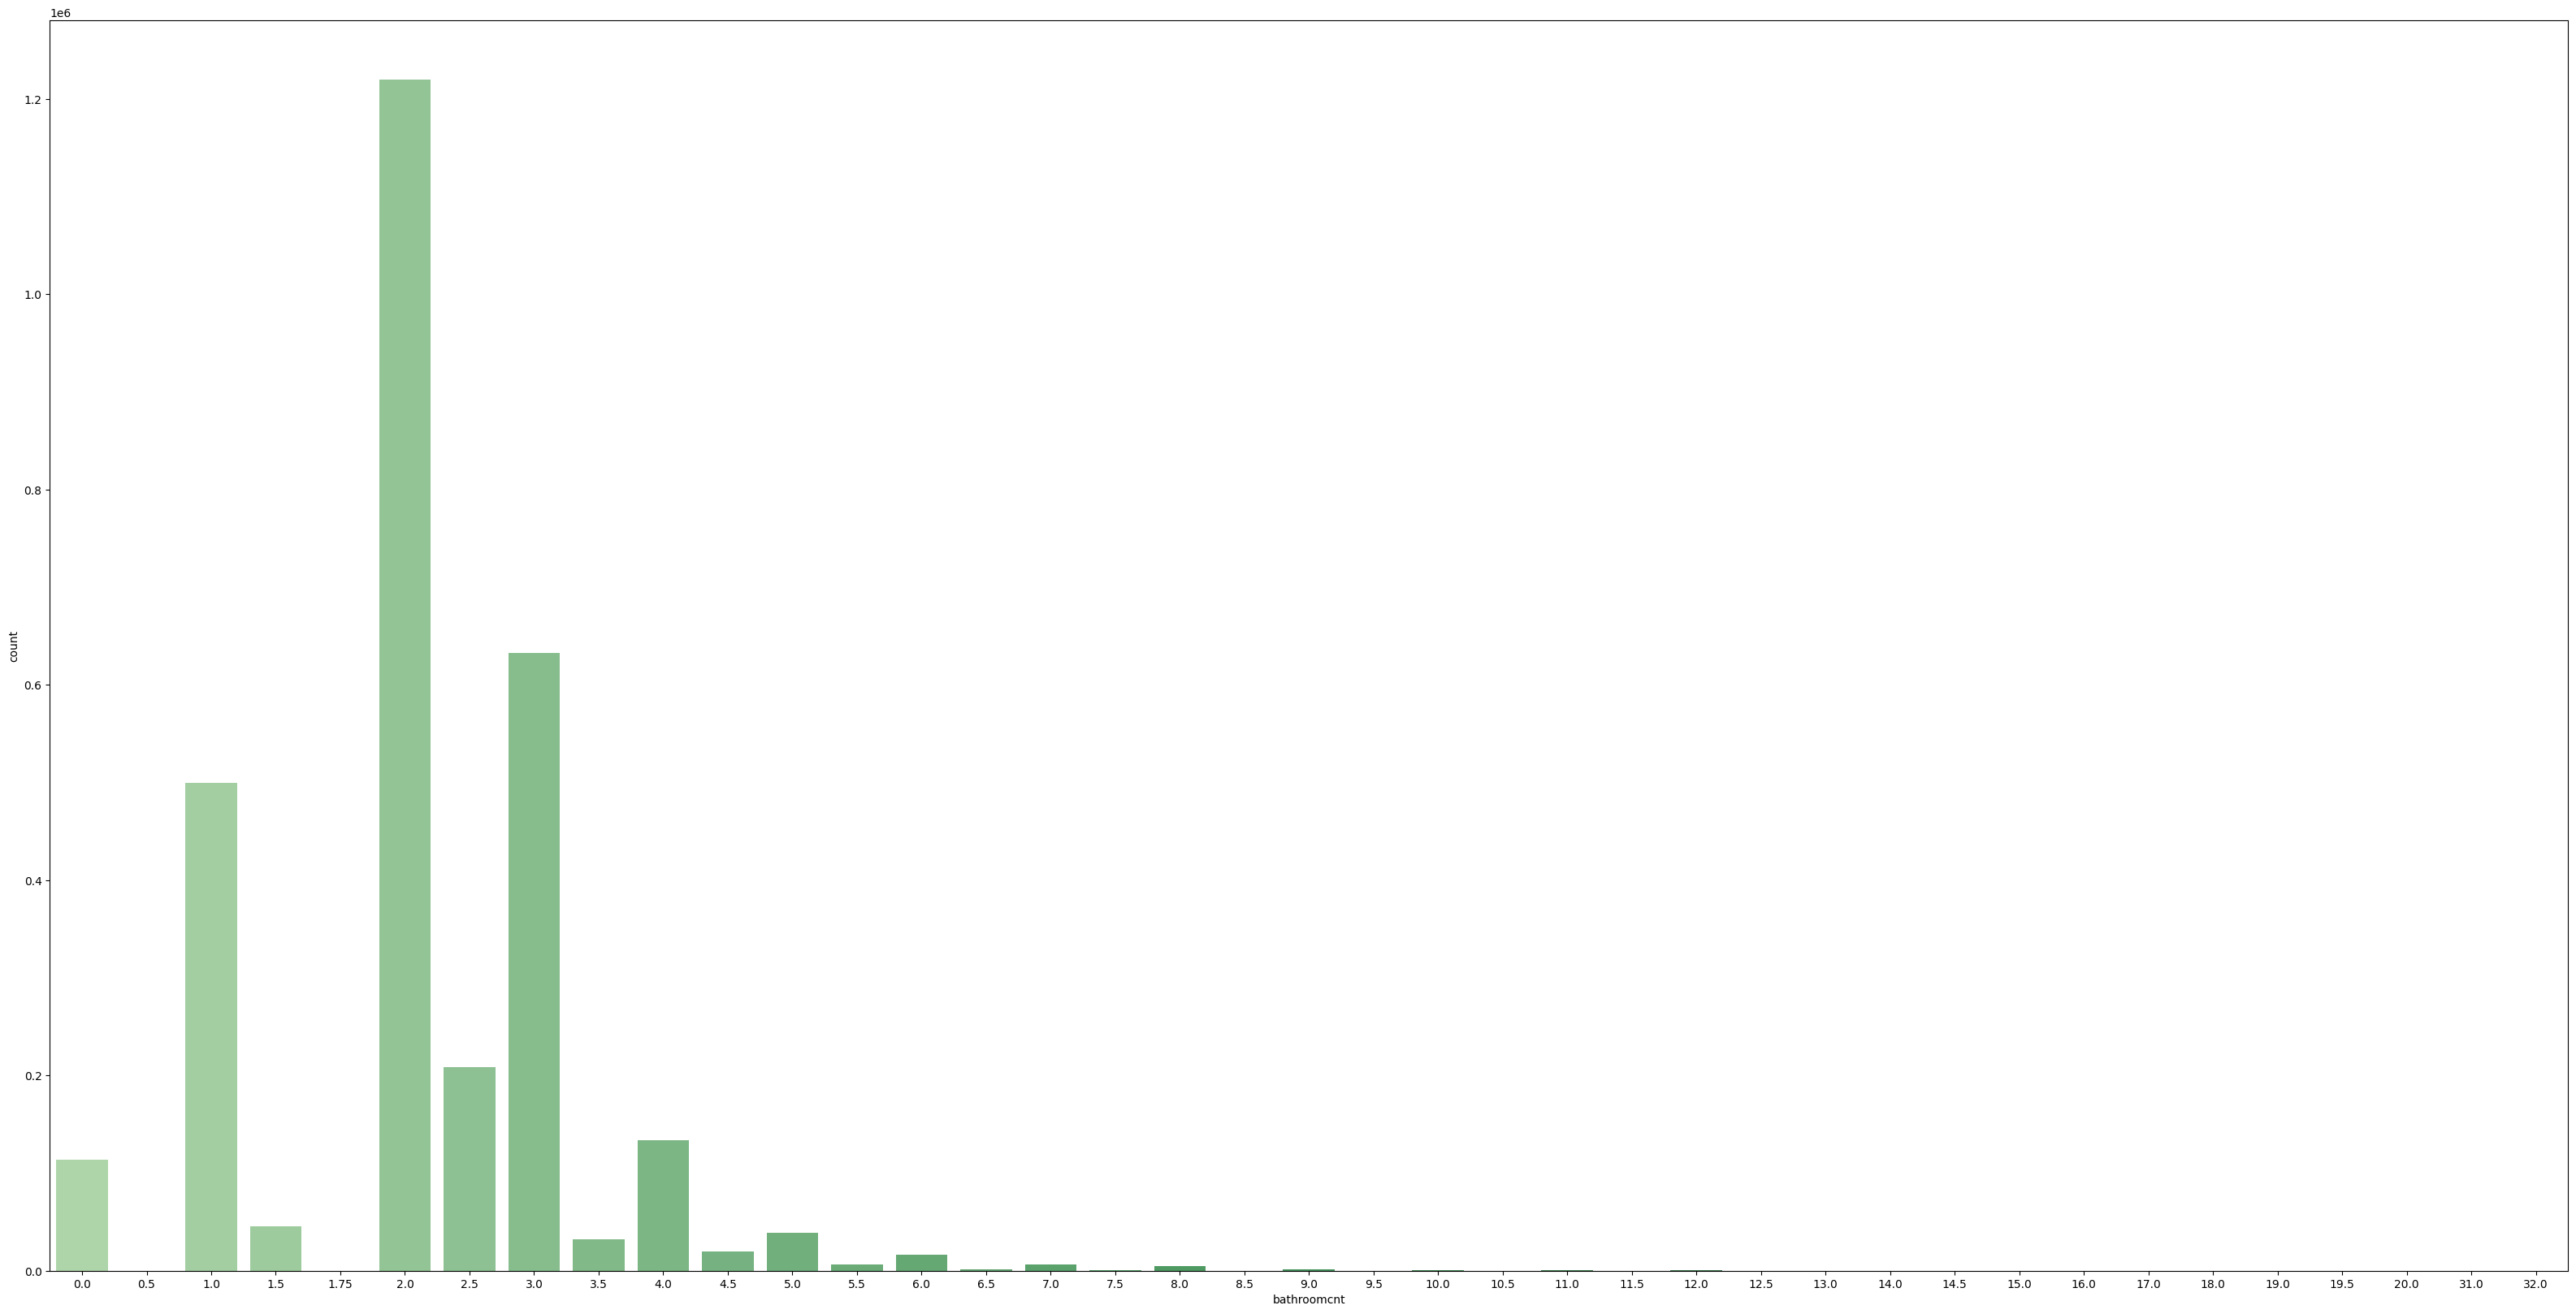

In [9]:
plt.figure(figsize=(40,20))
sns.countplot(x="bathroomcnt", data=project, palette="Greens_d")

In [10]:
totodrop = ['propertycountylandusecode'
          ]

project.drop(totodrop, inplace = True, axis = 1)
project.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,3101.0,96337.0,0.0,NaN,NaN,9.0,2016.0,9.0,NaN,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,3101.0,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,3101.0,96095.0,0.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,3101.0,96424.0,0.0,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,3101.0,96450.0,0.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17,NaN


In [11]:
project2 = project.fillna(project.mean())

In [13]:
train = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/train_2017.csv", parse_dates=["transactiondate"])

In [14]:
train.isnull().sum()

,0
parcelid,0
logerror,0
transactiondate,0


### We planned to merge 2 datasets mainly because aim of the competition was to improve the log error and for improving the log error we needed to have some parameters from the properties 2017 dataset also which would help us in predicting future log errors.

In [15]:
train1 = pd.merge(train, project2, on='parcelid', how='left')

<Axes: >

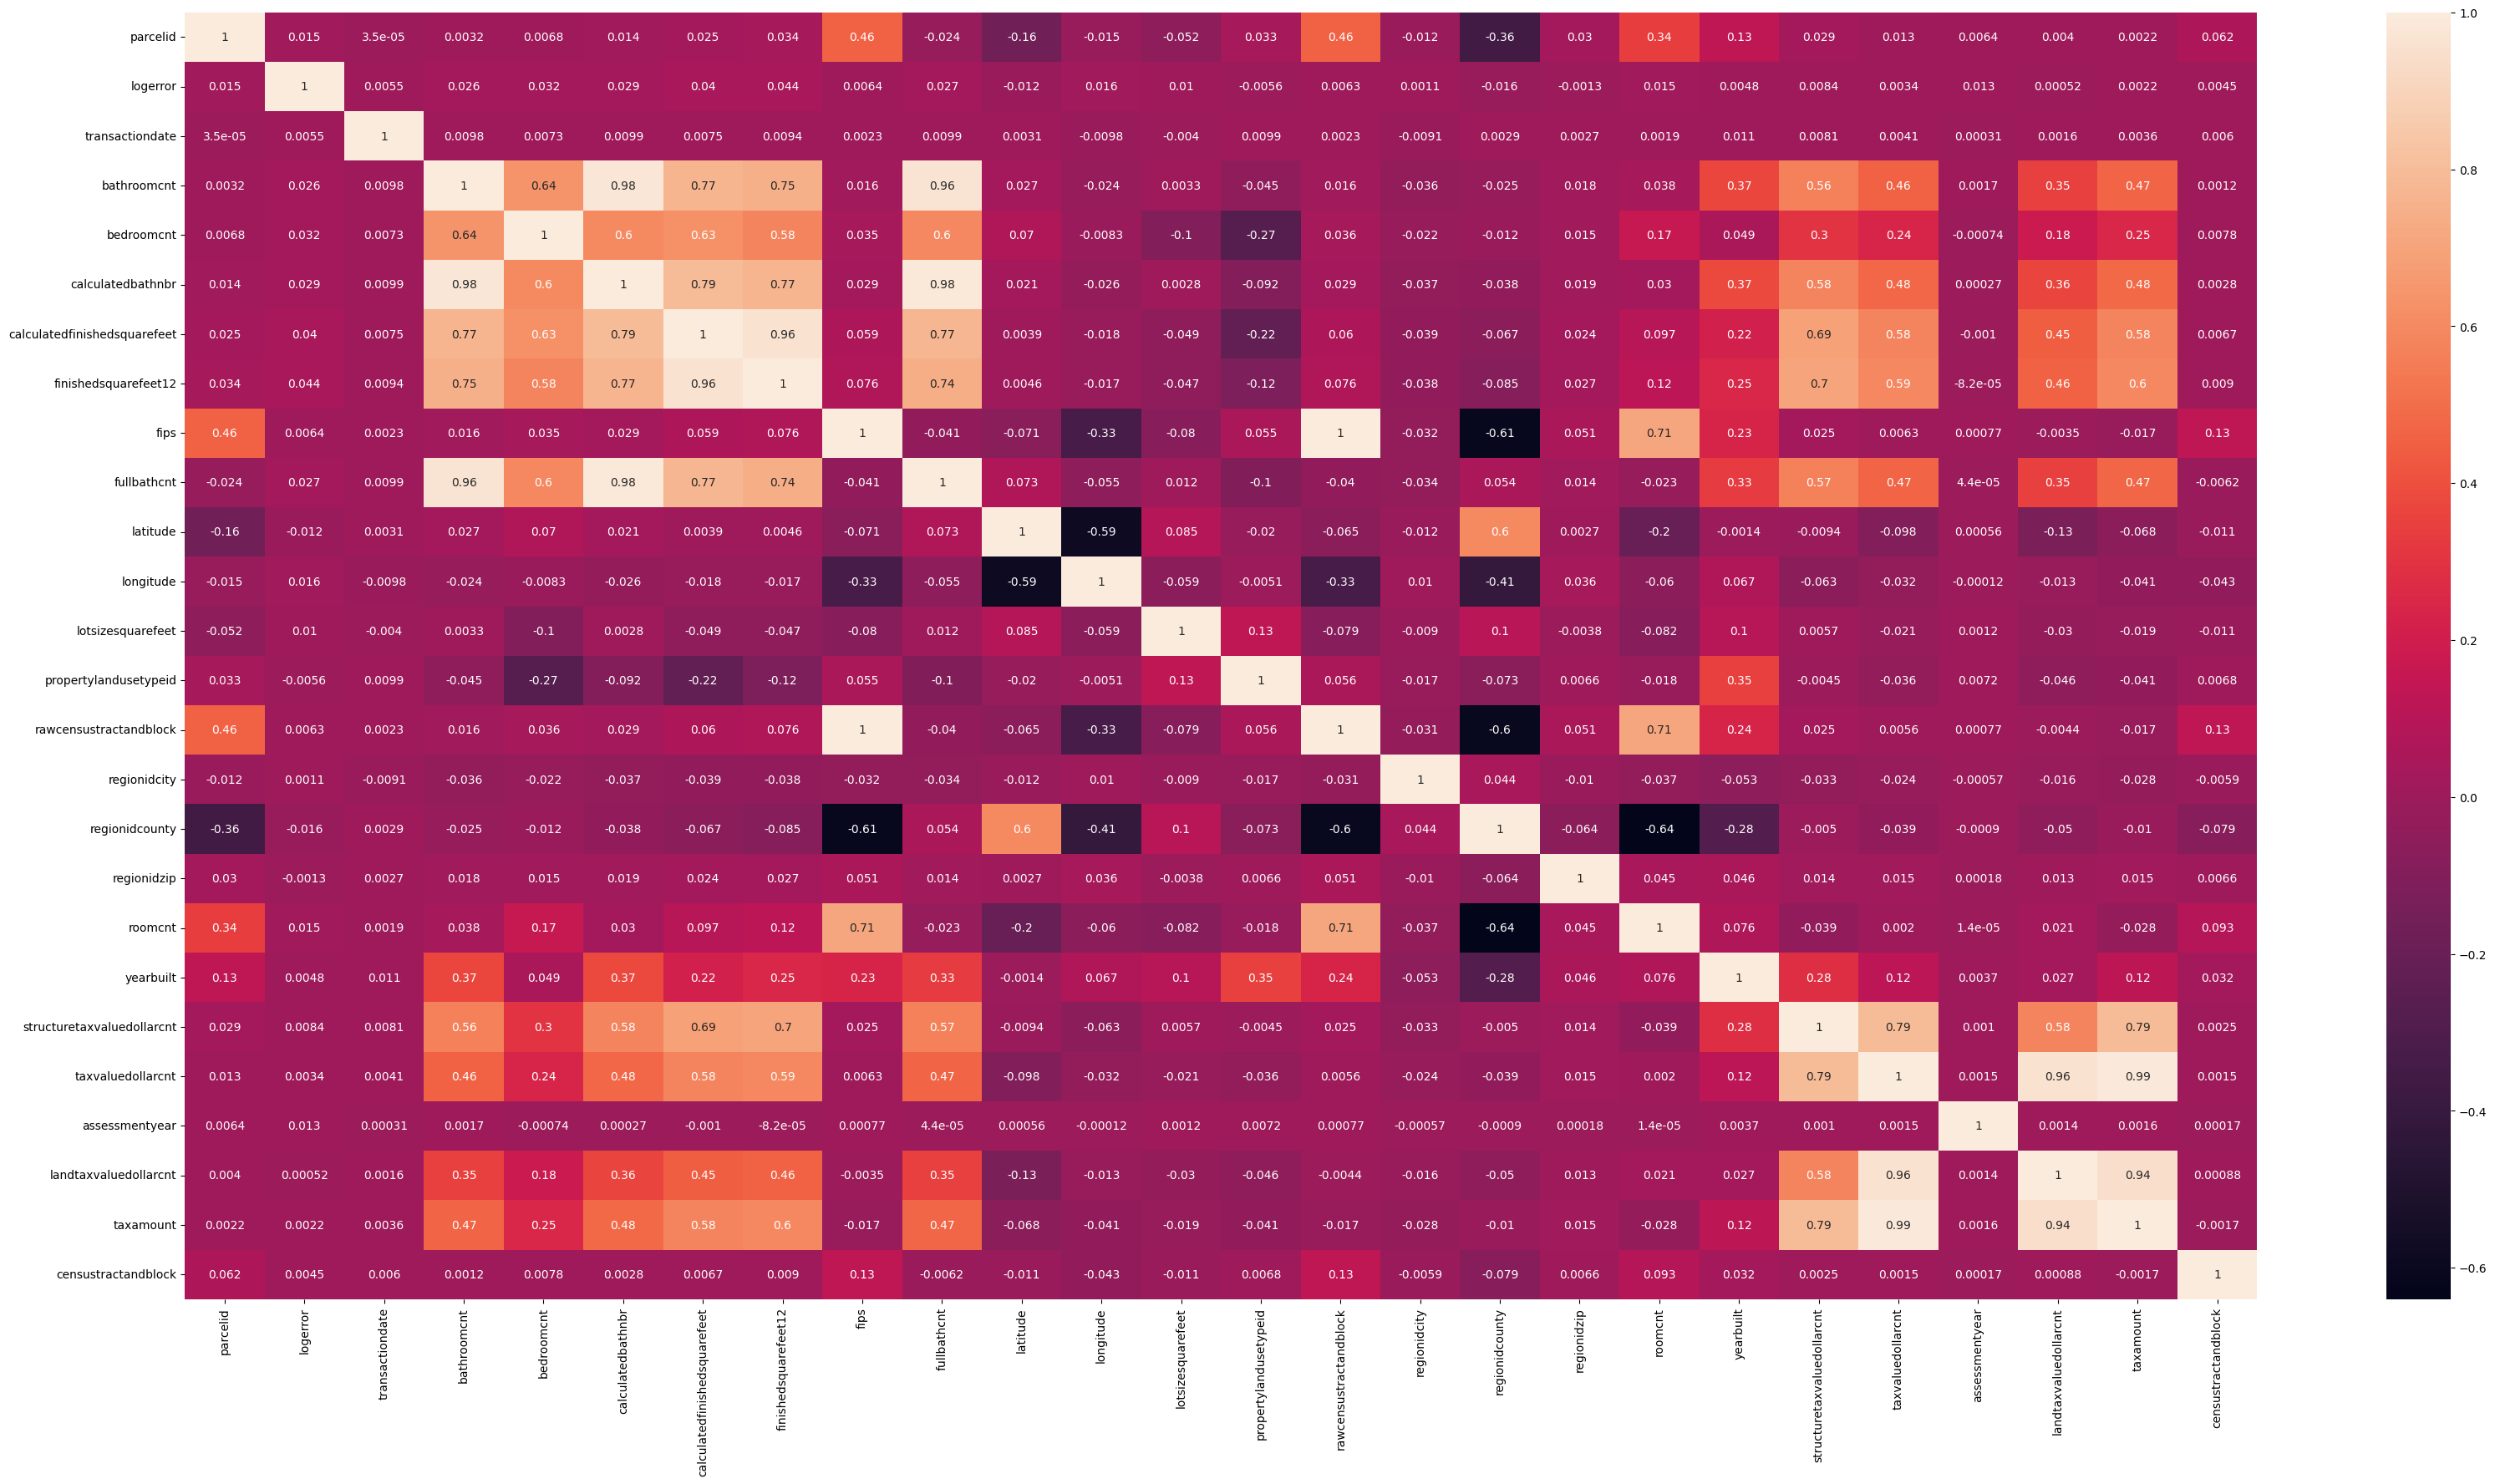

In [16]:
plt.figure(figsize=(40,20))
sns.heatmap(train1.corr(),annot=True)

## Linear Regression

In [17]:
from collections import Counter
import random
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [18]:
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
from __future__ import print_function

### Divided the train and test data taking log error into consideration

In [19]:
X=train1.drop(['parcelid','transactiondate','logerror'],axis=1)
y=train1['logerror']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
logmodel = LinearRegression()

### We are here fitting the model into X_train and y_train

In [25]:
logmodel.fit(X_train,y_train)

LinearRegression()

In [26]:
print(logmodel.intercept_)

0.1284691563217379


In [27]:
logmodel.coef_

array([-1.98567812e-02,  2.43203292e-03,  1.64898375e-02, -3.23945285e-06,
        1.85092881e-05, -6.44231897e-04,  2.26623788e-03, -4.76222729e-09,
        8.29399895e-09,  2.43283145e-08,  4.25404056e-04,  8.05233958e-08,
       -2.71555650e-09,  1.02268894e-06,  1.08005788e-07, -6.07896300e-04,
       -5.93674022e-05, -2.30622447e-07,  1.88471261e-07, -3.31094952e-08,
       -1.89257524e-07,  1.75507243e-07,  4.15032592e-16])

In [28]:
X_train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')

In [29]:
pd.DataFrame(logmodel.coef_,X.columns,columns=['Coeff'])

,Coeff
bathroomcnt,-1.985678e-02
bedroomcnt,2.432033e-03
calculatedbathnbr,1.648984e-02
calculatedfinishedsquarefeet,-3.239453e-06
finishedsquarefeet12,1.850929e-05
fips,-6.442319e-04
fullbathcnt,2.266238e-03
latitude,-4.762227e-09
longitude,8.293999e-09
lotsizesquarefeet,2.432831e-08


In [30]:
predictions = logmodel.predict(X_test)

In [31]:
predictions

array([0.00710956, 0.01507482, 0.01746804, ..., 0.0514528 , 0.01533257,
       0.01358894])

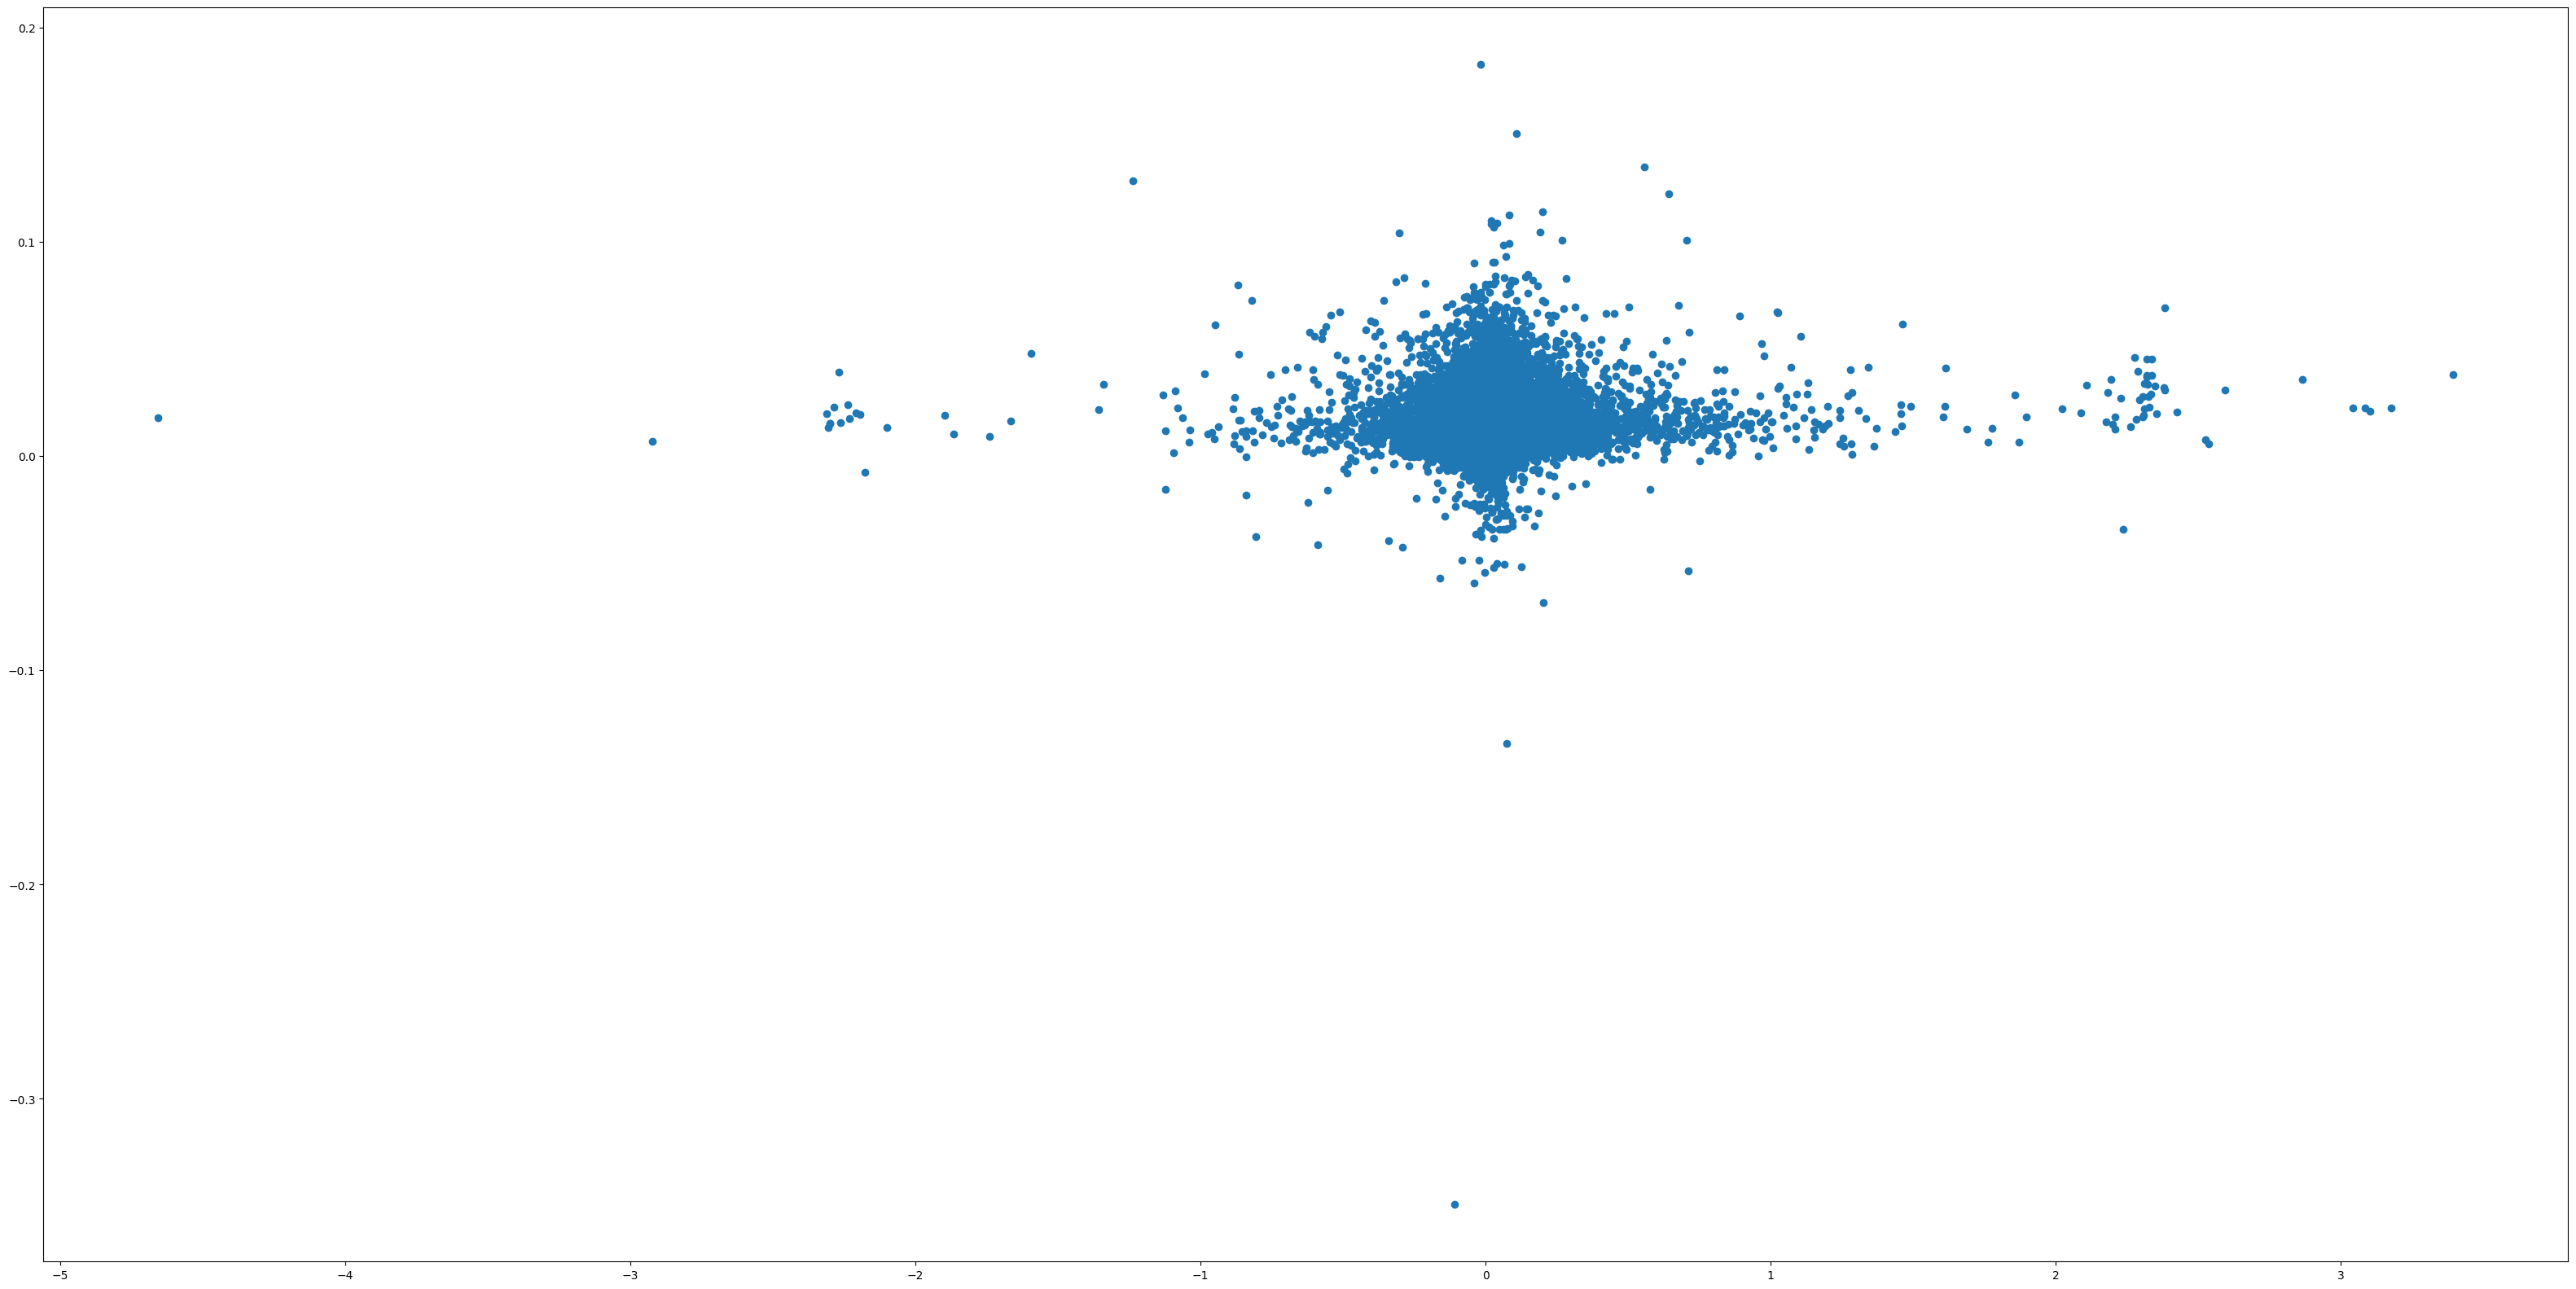

In [32]:
%matplotlib inline
plt.figure(figsize=(40,20))
plt.scatter(y_test,predictions)

In [33]:
dfr = pd.DataFrame({'y_test': y_test,'predictions': predictions})
dfr

,y_test,predictions
77097,0.052601,0.007110
20930,-0.039471,0.015075
11807,0.074354,0.017468
24835,-0.060827,0.041061
71879,-0.068134,0.016399
...,...,...
41244,-0.099770,0.013522
5234,0.060466,0.019851
47399,0.000360,0.051453
64990,0.090621,0.015333


In [34]:
from sklearn import metrics

#### So as per the above analysis our model has scored 0. So there is no point to further move ahead with this dataset as it makes no sense in the predictions of logerror

In [35]:
print('Variance score: %.2f' % logmodel.score(X_test, y_test))

Variance score: 0.00


In [36]:
logmodel.score(X, y)

0.003596846663855291

In [37]:
# Mean Squared Error
print(metrics.mean_squared_error(y_test, predictions))

0.028924333233604535


In [38]:
# Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.1700715532756861


###  What metrics can we used for regression problems?

#### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

#### 1n∑i=1n|yi−y^i|

#### Mean Squared Error (MSE) is the mean of the squared errors:

#### 1n∑i=1n(yi−y^i)2

#### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

#### 1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√

## XGBOOST,LightGBM, OLS

### Importing all the importing libraries which will be used for performing analysis using XGBOOST, LightGBM and OLS

In [39]:
# imports
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [40]:
from sklearn.linear_model import LinearRegression
import random
import datetime as dt

### Parameters

In [41]:
XGB_WEIGHT = 0.6415
BASELINE_WEIGHT = 0.0056
OLS_WEIGHT = 0.0828

XGB1_WEIGHT = 0.8083  # Weight of first in combination of two XGB models

BASELINE_PRED = 0.0115   # Baseline based on mean of training data, per Oleg

### Reading data from CSV

In [45]:
print( "\nReading data from disk ...")
prop = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/properties_2017.csv',low_memory = False)
train = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/train_2017.csv")


Reading data from disk ...


In the below code I have **merged** both the properties and train data sets with the help of the join key named ParcelId, filled the null values with the median values and also processed the data for LightGBM and dropped some irrelevant columns

## PROCESS DATA FOR LIGHTGBM

In [47]:
import numpy as np
for c, dtype in zip(prop.columns, prop.dtypes):
    if dtype == np.float64:
        prop[c] = prop[c].astype(np.float32)

df_train = train.merge(prop, how='left', on='parcelid')
numeric_cols = df_train.select_dtypes(include=['number']).columns
df_train[numeric_cols] = df_train[numeric_cols].fillna(df_train[numeric_cols].median())

x_train = df_train.drop(
    ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc',
     'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag'],
    axis=1
)

#### Code below gives the shape of an array along x_train and y_train

In [48]:
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)


train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

del df_train; gc.collect()

x_train = x_train.values.astype(np.float32, copy=False)
d_train = lgb.Dataset(x_train, label=y_train)

(77613, 53) (77613,)


### Initializing Parameters

Description of the parameters of LightGBM :

##### RUN LIGHTGBM

In [49]:
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.0021 # shrinkage_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'          # or 'mae'
params['sub_feature'] = 0.345
params['bagging_fraction'] = 0.85 # sub_row
# Note: To enable bagging, bagging_freq should be set to a non zero value as well
params['bagging_freq'] = 40 #after every 40 iterations bagging will be performed
params['num_leaves'] = 512        # num_leaf
params['min_data'] = 500         # min_data_in_leaf
params['min_hessian'] = 0.05     # min_sum_hessian_in_leaf
params['verbose'] = 0
params['feature_fraction_seed'] = 2
params['bagging_seed'] = 3

In [50]:
print("\nFitting LightGBM model ...")
clf = lgb.train(params, d_train, 430)

del d_train; gc.collect()
del x_train; gc.collect()


Fitting LightGBM model ...
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

0

In [53]:
print("\nPrepare for LightGBM prediction ...")
print("   Read sample file ...")
sample = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/sample_submission.csv')
print("   ...")


Prepare for LightGBM prediction ...
   Read sample file ...
   ...


In [54]:
sample['parcelid'] = sample['ParcelId']
print("   Merge with property data ...")
df_test = sample.merge(prop, on='parcelid', how='left')
print("   ...")
del sample, prop; gc.collect()
print("   ...")

   Merge with property data ...
   ...
   ...


In [55]:
x_test = df_test[train_columns]
print("   ...")
del df_test; gc.collect()
print("   Preparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
print("   ...")
x_test = x_test.values.astype(np.float32, copy=False)
print("Test shape :", x_test.shape)

   ...
   Preparing x_test...
   ...
Test shape : (2985217, 53)


In [56]:
print("\nStart LightGBM prediction ...")
p_test = clf.predict(x_test)

del x_test; gc.collect()

print( "\nUnadjusted LightGBM predictions:" )
print( pd.DataFrame(p_test).head() )


Start LightGBM prediction ...

Unadjusted LightGBM predictions:
          0
0  0.034894
1  0.035426
2  0.013780
3  0.015700
4  0.016441


## XGBoost ##

 **XGBoost** is an open-source software library which provides the gradient boosting framework for C++, Java, Python, R, and Julia. It works on Linux, Windows, and macOS.

 **XGBoost** is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or    tabular data.

 **XGBoost** is an implementation of gradient boosted decision trees designed for speed and performance.

##### RE-READ PROPERTIES FILE

In [58]:
print( "\nRe-reading properties file ...")
properties = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/properties_2017.csv')


Re-reading properties file ...


<ipython-input-58-b9d223060837>:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties = pd.read_csv('/content/drive/MyDrive/zillow-prize-1/properties_2017.csv')


##### PROCESS DATA FOR XGBOOST

LabelEncoder can be used to normalize labels.
It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

**fit(y)** : To Fit label encoder

**inverse_transform(y)** : To Transform labels back to original encoding

In [59]:
print( "\nProcessing data for XGBoost ...")
for c in properties.columns:
    properties[c]=properties[c].fillna(-1)
    if properties[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(properties[c].values))
        properties[c] = lbl.transform(list(properties[c].values))

train_df = train.merge(properties, how='left', on='parcelid')
x_train = train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
x_test = properties.drop(['parcelid'], axis=1)
# shape
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))


Processing data for XGBoost ...
Shape train: (77613, 57)
Shape test: (2985217, 57)


### Dropping out ouliers

In [60]:
train_df=train_df[ train_df.logerror > -0.4 ]
train_df=train_df[ train_df.logerror < 0.419 ]
x_train=train_df.drop(['parcelid', 'logerror','transactiondate'], axis=1)
y_train = train_df["logerror"].values.astype(np.float32)
y_mean = np.mean(y_train)

print('After removing outliers:')
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

After removing outliers:
Shape train: (75949, 57)
Shape test: (2985217, 57)


##### RUN XGBOOST

In [61]:
print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,
    'alpha': 0.4,
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

num_boost_rounds = 250
print("num_boost_rounds="+str(num_boost_rounds))


Setting up data for XGBoost ...
num_boost_rounds=250


In [62]:
# train model
print( "\nTraining XGBoost ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost ...")
xgb_pred1 = model.predict(dtest)

print( "\nFirst XGBoost predictions:" )
print( pd.DataFrame(xgb_pred1).head() )


Training XGBoost ...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)



Predicting with XGBoost ...

First XGBoost predictions:
          0
0  0.059813
1  0.073384
2 -0.005098
3 -0.011827
4  0.007167


##### RUN XGBOOST AGAIN

In [63]:
print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.033,
    'max_depth': 6,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'base_score': y_mean,
    'silent': 1
}

num_boost_rounds = 150
print("num_boost_rounds="+str(num_boost_rounds))


Setting up data for XGBoost ...
num_boost_rounds=150


In [64]:
print( "\nTraining XGBoost again ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost again ...")
xgb_pred2 = model.predict(dtest)

print( "\nSecond XGBoost predictions:" )
print( pd.DataFrame(xgb_pred2).head() )


Training XGBoost again ...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:50:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)



Predicting with XGBoost again ...

Second XGBoost predictions:
          0
0  0.067323
1  0.058426
2 -0.027192
3 -0.027234
4  0.000204


##### COMBINE XGBOOST RESULTS

In [65]:
xgb_pred = XGB1_WEIGHT*xgb_pred1 + (1-XGB1_WEIGHT)*xgb_pred2
#xgb_pred = xgb_pred1

print( "\nCombined XGBoost predictions:" )
print( pd.DataFrame(xgb_pred).head() )

del train_df
del x_train
del x_test
del properties
del dtest
del dtrain
del xgb_pred1
del xgb_pred2
gc.collect()


Combined XGBoost predictions:
          0
0  0.061253
1  0.070516
2 -0.009334
3 -0.014781
4  0.005832


120

##    OLS     ##

In [72]:
np.random.seed(17)
random.seed(17)

train = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/train_2017.csv", parse_dates=["transactiondate"])
properties = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/properties_2017.csv")
submission = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/sample_submission.csv")
print(len(train),len(properties),len(submission))

def get_features(df):
    df["transactiondate"] = pd.to_datetime(df["transactiondate"])
    df["transactiondate_year"] = df["transactiondate"].dt.year
    df["transactiondate_month"] = df["transactiondate"].dt.month
    df['transactiondate'] = df['transactiondate'].dt.quarter
    df = df.fillna(-1.0)
    return df

def MAE(y, ypred):
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)

train = pd.merge(train, properties, how='left', on='parcelid')
y = train['logerror'].values
test = pd.merge(submission, properties, how='left', left_on='ParcelId', right_on='parcelid')
properties = [] #memory

exc = [train.columns[c] for c in range(len(train.columns)) if train.dtypes[c] == 'O'] + ['logerror','parcelid']
col = [c for c in train.columns if c not in exc]

train = get_features(train[col])
test['transactiondate'] = '2017-01-01' #should use the most common training date
test = get_features(test[col])

reg = LinearRegression(n_jobs=-1)
reg.fit(train, y); print('fit...')
print(MAE(y, reg.predict(train)))
train = [];  y = [] #memory

test_dates = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_columns = ['201610','201611','201612','201710','201811','201812']

<ipython-input-72-617eff288692>:5: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties = pd.read_csv("/content/drive/MyDrive/zillow-prize-1/properties_2017.csv")


77613 2985217 2985217


<ipython-input-72-617eff288692>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  exc = [train.columns[c] for c in range(len(train.columns)) if train.dtypes[c] == 'O'] + ['logerror','parcelid']
<ipython-input-72-617eff288692>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  exc = [train.columns[c] for c in range(len(train.columns)) if train.dtypes[c] == 'O'] + ['logerror','parcelid']
<ipython-input-72-617eff288692>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

fit...
0.07095959529638618


##  Combine and Save  ##
##### COMBINE PREDICTIONS

In [73]:
print( "\nCombining XGBoost, LightGBM, and baseline predicitons ..." )
lgb_weight = (1 - XGB_WEIGHT - BASELINE_WEIGHT) / (1 - OLS_WEIGHT)
xgb_weight0 = XGB_WEIGHT / (1 - OLS_WEIGHT)
baseline_weight0 =  BASELINE_WEIGHT / (1 - OLS_WEIGHT)
pred0 = xgb_weight0*xgb_pred + baseline_weight0*BASELINE_PRED + lgb_weight*p_test


Combining XGBoost, LightGBM, and baseline predicitons ...


In [74]:
print( "\nCombined XGB/LGB/baseline predictions:" )
print( pd.DataFrame(pred0).head() )


Combined XGB/LGB/baseline predictions:
          0
0  0.056337
1  0.063020
2 -0.001156
3 -0.004227
4  0.010475


In [75]:
print( "\nPredicting with OLS and combining with XGB/LGB/baseline predicitons: ..." )
for i in range(len(test_dates)):
    test['transactiondate'] = test_dates[i]
    pred = OLS_WEIGHT*reg.predict(get_features(test)) + (1-OLS_WEIGHT)*pred0
    submission[test_columns[i]] = [float(format(x, '.4f')) for x in pred]
    print('predict...', i)


Predicting with OLS and combining with XGB/LGB/baseline predicitons: ...
predict... 0
predict... 1
predict... 2
predict... 3
predict... 4
predict... 5


In [76]:
print( "\nCombined XGB/LGB/baseline/OLS predictions:" )
print( submission.head() )


Combined XGB/LGB/baseline/OLS predictions:
   ParcelId  201610  201611  201612  201710  201711  201712  201811  201812
0  10754147  0.0578  0.0578  0.0579  0.0578       0       0  0.0578  0.0579
1  10759547  0.0635  0.0635  0.0635  0.0635       0       0  0.0635  0.0635
2  10843547  0.0277  0.0278  0.0278  0.0277       0       0  0.0278  0.0278
3  10859147 -0.0001 -0.0000 -0.0000 -0.0001       0       0 -0.0000 -0.0000
4  10879947  0.0154  0.0154  0.0154  0.0154       0       0  0.0154  0.0154


##### WRITE THE RESULTS

In [77]:
from datetime import datetime
print( "\nWriting results to disk ..." )
submission.to_csv('sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)
print( "\nFinished ...")


Writing results to disk ...

Finished ...


# Summary :

In this notebook we have performed Linear Regression and XGBoost and LightGBM in order to predict the future log error . In Linear we have received a **very low variance score(= 0)** which made us think that Linear Regression model does not fit out dataset and we need to think about implementing some other methods for predicting and increasing the accuracy of the log error in the future. So, we decided to use LightGBM and XGBoost in order to predict the log error values in **Q4 of 2017**.